In [1]:
import numpy as np
import pylab as pl
from matplotlib.ticker import ScalarFormatter
import seaborn.apionly as sns

from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)

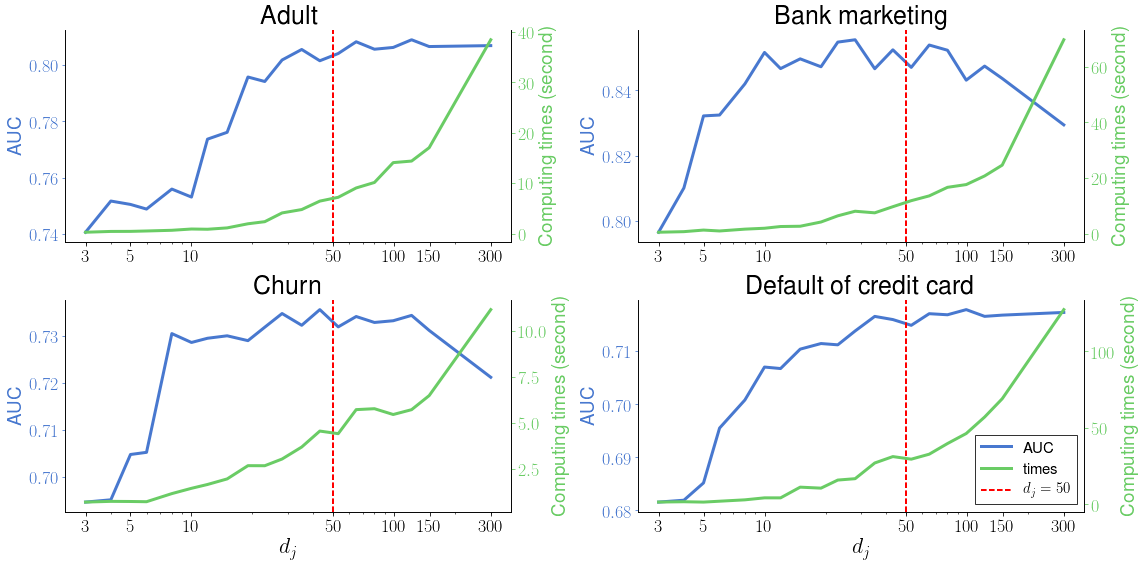

In [5]:
filenames = ["adult", "bank", "churn", "default_cb"]
lw = 3
fig = pl.figure(figsize=(16, 8))
folfer = 'results_final' # results results_final

blue = sns.color_palette("muted")[0]
green = sns.color_palette("muted")[1]

for i, filename in enumerate(filenames):
    AUC = np.load('./%s/AUC-%s.npy' % (folfer, filename))
    times = np.load('./%s/times-%s.npy' % (folfer, filename))
    n_cuts_grid = np.load('./%s/n_cuts_grid-%s.npy' % (folfer, filename))
    
    ax1 = fig.add_subplot(2,2,i+1)
    ax2 = ax1.twinx()
    plot1 = ax1.plot(n_cuts_grid, AUC , '-', color=blue, lw=lw, label=r"AUC")
    plot2 = ax2.plot(n_cuts_grid, times, '-', color=green, lw=lw, label=r"times")
    plot3 = ax1.axvline(x=50, linewidth=2, color='r', label=r'$d_j=50$',
                       linestyle='dashed')
    
    if(filename == 'bank'):
        title = 'Bank marketing'
    elif(filename == 'default_cb'):
        title = 'Default of credit card'
    else:
        title = filename.capitalize()
    pl.title(title, fontsize=25)
    
    ax1.set_ylabel(r"AUC", fontsize=19, color=blue)
    ax1.tick_params('y', colors=blue)
    ax1.set_xscale('log')
    ax2.set_ylabel(r"Computing times (second)", fontsize=19, color=green)
    ax2.tick_params('y', colors=green)
    ax1.spines['top'].set_visible(False)
    ax2.spines['top'].set_visible(False)

    if i == 3:
        plots = plot1+plot2+[plot3]
        labs = [l.get_label() for l in plots]
        leg = ax1.legend(plots, labs, loc="lower right", prop={'size':15}, fancybox=False)
        leg.get_frame().set_edgecolor('black')

    ax1.set_xticks([3, 5, 10, 50, 100, 150, 300])
    ax1.get_xaxis().set_major_formatter(ScalarFormatter())
    ax1.tick_params(axis='both', which='major', labelsize=18)
    ax2.tick_params(axis='both', which='major', labelsize=18)

    if i > 1:
        ax1.set_xlabel(r"$d_j$", fontsize=22)
fig.tight_layout()
pl.savefig('./discretization_impact.pdf', bbox_inches='tight')
pl.show()